In [ ]:
import pandas as pd
import numpy as np

sales_data = pd.read_csv("Sales.csv")
product_data = pd.read_csv("Products.csv")
store_data = pd.read_csv("Stores.csv")
exchange_rate_data = pd.read_csv("Exchange_Rates.csv")
customer_data = pd.read_csv("Customers.csv", encoding = 'ISO-8859-1')

In [5]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [7]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [9]:
sales_data.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [11]:
perc = sales_data.isnull().mean()* 100
perc

Order Number      0.000000
Line Item         0.000000
Order Date        0.000000
Delivery Date    79.064627
CustomerKey       0.000000
StoreKey          0.000000
ProductKey        0.000000
Quantity          0.000000
Currency Code     0.000000
dtype: float64

In [13]:
sales_data.drop('Delivery Date', axis=1, inplace=True)

In [15]:
sales_data

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,331277,0,1717,2,CAD


In [17]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

In [19]:
sales_data.tail()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
62879,2243030,1,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD
62883,2243032,3,2021-02-20,331277,0,464,7,CAD


In [3]:
import mysql.connector as db

db_connection = db.connect(
    host = "localhost",
    user = "root",
    password = "Pink@2213",
    database = "dataspark"
)

In [5]:
curr = db_connection.cursor()

In [125]:
for index, row in sales_data.iterrows():
    sql = "INSERT INTO dataspark.salesdata \
            (Order_Number, Line_Item, Order_Date, CustomerKey, StoreKey, ProductKey, Quantity, \
            Currency_Code) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)"
    val = tuple(row)
    curr.execute(sql, val)

db_connection.commit()

In [7]:
product_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [9]:
product_data.isnull().sum()


ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [11]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [17]:
product_data['Unit Cost USD'] = product_data['Unit Cost USD'].str.replace('$', '', regex=False)
product_data['Unit Cost USD'] = product_data['Unit Cost USD'].str.replace(',', '', regex=False)
product_data['Unit Cost USD'] = product_data['Unit Cost USD'].str.strip()
product_data['Unit Cost USD'] = pd.to_numeric(product_data['Unit Cost USD'])

In [19]:
product_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [21]:
product_data['Unit Price USD'] = product_data['Unit Price USD'].str.replace('$', '', regex=False)
product_data['Unit Price USD'] = product_data['Unit Price USD'].str.replace(',', '', regex=False)
product_data['Unit Price USD'] = product_data['Unit Price USD'].str.strip()
product_data['Unit Price USD'] = pd.to_numeric(product_data['Unit Price USD'])

In [23]:
product_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [25]:
for index, row in product_data.iterrows():
    sql = "INSERT INTO dataspark.productdata \
            (ProductKey, Product_Name, Brand, Color, Unit_Cost_USD, Unit_Price_USD, SubcategoryKey, \
            Subcategory, CategoryKey, Category) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    val = tuple(row)
    curr.execute(sql, val)

db_connection.commit()

In [27]:
pd.merge(sales_data, product_data, on = "ProductKey", how = "inner")

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys


In [29]:
merged_sales_prod = pd.merge(sales_data, product_data, on = "ProductKey", how = "inner")

In [31]:
merged_sales_prod.isnull().sum()

Order Number      0
Line Item         0
Order Date        0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [33]:
merged_sales_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    62884 non-null  int64         
 1   Line Item       62884 non-null  int64         
 2   Order Date      62884 non-null  datetime64[ns]
 3   CustomerKey     62884 non-null  int64         
 4   StoreKey        62884 non-null  int64         
 5   ProductKey      62884 non-null  int64         
 6   Quantity        62884 non-null  int64         
 7   Currency Code   62884 non-null  object        
 8   Product Name    62884 non-null  object        
 9   Brand           62884 non-null  object        
 10  Color           62884 non-null  object        
 11  Unit Cost USD   62884 non-null  object        
 12  Unit Price USD  62884 non-null  object        
 13  SubcategoryKey  62884 non-null  int64         
 14  Subcategory     62884 non-null  object        
 15  Ca

In [35]:
exchange_rate_data

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [37]:
exchange_rate_data.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [39]:
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [41]:
exchange_rate_data['Date'] = pd.to_datetime(exchange_rate_data['Date'])

In [43]:
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11215 non-null  datetime64[ns]
 1   Currency  11215 non-null  object        
 2   Exchange  11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [147]:
for index, row in exchange_rate_data.iterrows():
    sql = "INSERT INTO dataspark.exchangeratedata \
            (Date, Currency, Exchange) VALUES (%s, %s, %s)"
    val = tuple(row)
    curr.execute(sql, val)

db_connection.commit()

In [47]:
exchange_rate_data = exchange_rate_data.rename(columns={'Date': 'Order Date'})

In [53]:
exchange_rate_data = exchange_rate_data.rename(columns={'Currency': 'Currency Code'})

In [55]:
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     11215 non-null  datetime64[ns]
 1   Currency Code  11215 non-null  object        
 2   Exchange       11215 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 263.0+ KB


In [57]:
pd.merge(merged_sales_prod,exchange_rate_data, on = ['Order Date','Currency Code'], how = 'inner')

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Exchange
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,White,$31.27,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,1.3884
1,366001,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders,1.0000
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances,1.0000
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders,1.3884
4,366002,2,2016-01-01,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers,1.3884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,White,$70.87,$139.00,305,Projectors & Screens,3,Computers,1.0000
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,$55.18,$120.00,106,Bluetooth Headphones,1,Audio,0.8238
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,$56.08,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books",1.2610
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,Pink,$32.25,$70.13,702,Download Games,7,Games and Toys,1.2610


In [59]:
df = pd.merge(merged_sales_prod,exchange_rate_data, on = ['Order Date','Currency Code'], how = 'inner')

In [61]:
corr_data = df.select_dtypes(include=['int64', 'float64']).corr()

In [63]:
corr_data

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity,SubcategoryKey,CategoryKey,Exchange
Order Number,1.000000,-0.004226,0.032111,-0.017122,0.001286,-0.000023,-0.011208,-0.011005,0.045253
Line Item,-0.004226,1.000000,-0.007515,-0.001714,0.001991,0.002188,0.001372,0.001359,0.001806
CustomerKey,0.032111,-0.007515,1.000000,0.556304,-0.008761,0.003747,-0.005919,-0.005903,-0.288179
StoreKey,-0.017122,-0.001714,0.556304,1.000000,-0.004206,0.002063,-0.002160,-0.002174,-0.247180
ProductKey,0.001286,0.001991,-0.008761,-0.004206,1.000000,-0.001255,0.932514,0.931227,-0.001606
Quantity,-0.000023,0.002188,0.003747,0.002063,-0.001255,1.000000,0.001605,0.001640,-0.002975
SubcategoryKey,-0.011208,0.001372,-0.005919,-0.002160,0.932514,0.001605,1.000000,0.999967,-0.000154
CategoryKey,-0.011005,0.001359,-0.005903,-0.002174,0.931227,0.001640,0.999967,1.000000,-0.000185
Exchange,0.045253,0.001806,-0.288179,-0.247180,-0.001606,-0.002975,-0.000154,-0.000185,1.000000


In [37]:
from scipy import stats    # Stats analysis
import numpy as np         # Math , random, array . etc.

import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
store_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [77]:
store_data.isnull().sum()


StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

In [75]:
store_data.fillna(0, inplace= True)

In [79]:
store_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [35]:
store_data['Square Meters'].isnull().sum()

0

In [37]:
perc = store_data.isnull().mean()* 100
perc

StoreKey         0.0
Country          0.0
State            0.0
Square Meters    0.0
Open Date        0.0
dtype: float64

In [45]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  67 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [153]:
store_data['Open Date'] = pd.to_datetime(store_data['Open Date'])

In [155]:
store_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [157]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Country        67 non-null     object        
 2   State          67 non-null     object        
 3   Square Meters  67 non-null     float64       
 4   Open Date      67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [159]:
for index, row in store_data.iterrows():
    sql = "INSERT INTO dataspark.storedata \
            (StoreKey, Country, State, Square_Meters, Open_Date) VALUES (%s, %s, %s, %s, %s)"
    val = tuple(row)
    curr.execute(sql, val)

db_connection.commit()

In [81]:
pd.merge(df,store_data, on = 'StoreKey', how = 'inner')

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Exchange,Country,State,Square Meters,Open Date
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,...,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,1.3884,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,...,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders,1.0000,Online,Online,0.0,1/1/2010
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,...,$665.94,803,Microwaves,8,Home Appliances,1.0000,Online,Online,0.0,1/1/2010
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,...,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders,1.3884,Online,Online,0.0,1/1/2010
4,366002,2,2016-01-01,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,...,$326.00,301,Laptops,3,Computers,1.3884,Online,Online,0.0,1/1/2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,...,$139.00,305,Projectors & Screens,3,Computers,1.0000,United States,Alaska,1190.0,1/1/2015
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,...,$120.00,106,Bluetooth Headphones,1,Audio,0.8238,Online,Online,0.0,1/1/2010
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,...,$109.99,602,Movie DVD,6,"Music, Movies and Audio Books",1.2610,Online,Online,0.0,1/1/2010
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,...,$70.13,702,Download Games,7,Games and Toys,1.2610,Online,Online,0.0,1/1/2010


In [83]:
df1 = pd.merge(df,store_data, on = 'StoreKey', how = 'inner')

In [127]:
df1.to_csv('DS_merged_sales_data.csv',index=False)

In [45]:
customer_data = pd.read_csv("Customers.csv", encoding = 'ISO-8859-1')

In [3]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [5]:
customer_data.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [9]:
customer_data.fillna('Napoli', inplace=True)

In [11]:
customer_data.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [13]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [15]:
customer_data['Birthday']

0          7/3/1939
1         9/27/1979
2         5/26/1947
3         9/17/1957
4        11/19/1965
            ...    
15261     3/25/1936
15262     2/16/1992
15263     11/9/1937
15264    10/12/1937
15265     8/18/1965
Name: Birthday, Length: 15266, dtype: object

In [17]:
customer_data['Birthday'] = pd.to_datetime(customer_data['Birthday'])

In [19]:
customer_data['Birthday']

0       1939-07-03
1       1979-09-27
2       1947-05-26
3       1957-09-17
4       1965-11-19
           ...    
15261   1936-03-25
15262   1992-02-16
15263   1937-11-09
15264   1937-10-12
15265   1965-08-18
Name: Birthday, Length: 15266, dtype: datetime64[ns]

In [21]:
customer_data['Age'] = 2024 - (customer_data['Birthday'].dt.year)

In [23]:
customer_data['Age']

0        85
1        45
2        77
3        67
4        59
         ..
15261    88
15262    32
15263    87
15264    87
15265    59
Name: Age, Length: 15266, dtype: int32

In [25]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,59
...,...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25,88
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16,32
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09,87
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12,87


In [33]:
for index, row in customer_data.iterrows():
    sql = "INSERT INTO dataspark.customerdata \
            (CustomerKey, Gender, Name, City, State_Code, State, Zip_Code, \
            Country, Continent, Birthday, Age) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    val = tuple(row)
    curr.execute(sql, val)

db_connection.commit()

In [119]:
pd.merge(sales_data, customer_data, on = 'CustomerKey', how = 'inner')

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,Age
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,53
1,366001,1,2016-01-01,1269051,0,1048,2,USD,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,29
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Male,Frank Upchurch,Auberry,CA,California,93602,United States,North America,1995-11-20,29
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,62
4,366002,2,2016-01-01,266019,0,373,1,CAD,Female,Joan Roche,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,1962-08-24,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,Male,Donald Woodie,Garden Grove,CA,California,92643,United States,North America,1939-04-16,85
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,Female,Gabriele Thalberg,Stuttgart Frauenkopf,BW,Baden-Württemberg,70184,Germany,Europe,1940-03-10,84
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,1993-05-25,31
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,Male,William Rochelle,Calgary,AB,Alberta,T2T 0C6,Canada,North America,1993-05-25,31


In [129]:
cust_merged_data = pd.merge(sales_data, customer_data, on = 'CustomerKey', how = 'inner')

In [131]:
cust_merged_data.to_csv('DS_cust_merged_data.csv',index=False)

In [27]:
data = pd.read_csv('DS_merged_sales_data.csv')

In [29]:
data.head(2)

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Exchange,Country,State,Square Meters,Open Date
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,...,$68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,1.3884,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,...,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders,1.0000,Online,Online,0.0,1/1/2010


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    62884 non-null  int64  
 1   Line Item       62884 non-null  int64  
 2   Order Date      62884 non-null  object 
 3   CustomerKey     62884 non-null  int64  
 4   StoreKey        62884 non-null  int64  
 5   ProductKey      62884 non-null  int64  
 6   Quantity        62884 non-null  int64  
 7   Currency Code   62884 non-null  object 
 8   Product Name    62884 non-null  object 
 9   Brand           62884 non-null  object 
 10  Color           62884 non-null  object 
 11  Unit Cost USD   62884 non-null  object 
 12  Unit Price USD  62884 non-null  object 
 13  SubcategoryKey  62884 non-null  int64  
 14  Subcategory     62884 non-null  object 
 15  CategoryKey     62884 non-null  int64  
 16  Category        62884 non-null  object 
 17  Exchange        62884 non-null 

In [33]:
df = data[['Quantity', 'Currency Code', 'Unit Cost USD', 'Unit Price USD', 'Exchange']]
df.to_csv('prof_data.csv',index=False)

In [35]:
df = pd.read_csv('prof_data.csv')

In [37]:
df

,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Exchange
0,1,CAD,$31.27,$68.00,1.3884
1,2,USD,$141.47,$427.00,1.0000
2,1,USD,$220.64,$665.94,1.0000
3,7,CAD,$148.08,$322.00,1.3884
4,1,CAD,$166.20,$326.00,1.3884
...,...,...,...,...,...
62879,3,USD,$70.87,$139.00,1.0000
62880,4,EUR,$55.18,$120.00,0.8238
62881,2,CAD,$56.08,$109.99,1.2610
62882,2,CAD,$32.25,$70.13,1.2610


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantity        62884 non-null  int64  
 1   Currency Code   62884 non-null  object 
 2   Unit Cost USD   62884 non-null  object 
 3   Unit Price USD  62884 non-null  object 
 4   Exchange        62884 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


In [41]:
df['Unit Cost USD'] = df['Unit Cost USD'].str.replace('$', '', regex=False)
df['Unit Cost USD'] = df['Unit Cost USD'].str.replace(',', '', regex=False)
df['Unit Cost USD'] = df['Unit Cost USD'].str.strip()
df['Unit Cost USD'] = pd.to_numeric(df['Unit Cost USD'])

In [43]:
df['Unit Price USD'] = df['Unit Price USD'].str.replace('$', '', regex=False)
df['Unit Price USD'] = df['Unit Price USD'].str.replace(',', '', regex=False)
df['Unit Price USD'] = df['Unit Price USD'].str.strip()
df['Unit Price USD'] = pd.to_numeric(df['Unit Price USD'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quantity        62884 non-null  int64  
 1   Currency Code   62884 non-null  object 
 2   Unit Cost USD   62884 non-null  float64
 3   Unit Price USD  62884 non-null  float64
 4   Exchange        62884 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.4+ MB


In [47]:
df

,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Exchange
0,1,CAD,31.27,68.00,1.3884
1,2,USD,141.47,427.00,1.0000
2,1,USD,220.64,665.94,1.0000
3,7,CAD,148.08,322.00,1.3884
4,1,CAD,166.20,326.00,1.3884
...,...,...,...,...,...
62879,3,USD,70.87,139.00,1.0000
62880,4,EUR,55.18,120.00,0.8238
62881,2,CAD,56.08,109.99,1.2610
62882,2,CAD,32.25,70.13,1.2610


In [49]:
df['cost_price_USD'] = df['Unit Cost USD'] * df['Quantity'] * df['Exchange']

In [51]:
df

,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Exchange,cost_price_USD
0,1,CAD,31.27,68.00,1.3884,43.415268
1,2,USD,141.47,427.00,1.0000,282.940000
2,1,USD,220.64,665.94,1.0000,220.640000
3,7,CAD,148.08,322.00,1.3884,1439.159904
4,1,CAD,166.20,326.00,1.3884,230.752080
...,...,...,...,...,...,...
62879,3,USD,70.87,139.00,1.0000,212.610000
62880,4,EUR,55.18,120.00,0.8238,181.829136
62881,2,CAD,56.08,109.99,1.2610,141.433760
62882,2,CAD,32.25,70.13,1.2610,81.334500


In [53]:
df['selling_price_USD'] = df.loc[:,'Unit Price USD'] * df.loc[:,'Quantity'] * df.loc[:,'Exchange']

In [55]:
df

,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Exchange,cost_price_USD,selling_price_USD
0,1,CAD,31.27,68.00,1.3884,43.415268,94.41120
1,2,USD,141.47,427.00,1.0000,282.940000,854.00000
2,1,USD,220.64,665.94,1.0000,220.640000,665.94000
3,7,CAD,148.08,322.00,1.3884,1439.159904,3129.45360
4,1,CAD,166.20,326.00,1.3884,230.752080,452.61840
...,...,...,...,...,...,...,...
62879,3,USD,70.87,139.00,1.0000,212.610000,417.00000
62880,4,EUR,55.18,120.00,0.8238,181.829136,395.42400
62881,2,CAD,56.08,109.99,1.2610,141.433760,277.39478
62882,2,CAD,32.25,70.13,1.2610,81.334500,176.86786


In [57]:
df['Profit'] = df['selling_price_USD'] - df['cost_price_USD']

In [59]:
df

,Quantity,Currency Code,Unit Cost USD,Unit Price USD,Exchange,cost_price_USD,selling_price_USD,Profit
0,1,CAD,31.27,68.00,1.3884,43.415268,94.41120,50.995932
1,2,USD,141.47,427.00,1.0000,282.940000,854.00000,571.060000
2,1,USD,220.64,665.94,1.0000,220.640000,665.94000,445.300000
3,7,CAD,148.08,322.00,1.3884,1439.159904,3129.45360,1690.293696
4,1,CAD,166.20,326.00,1.3884,230.752080,452.61840,221.866320
...,...,...,...,...,...,...,...,...
62879,3,USD,70.87,139.00,1.0000,212.610000,417.00000,204.390000
62880,4,EUR,55.18,120.00,0.8238,181.829136,395.42400,213.594864
62881,2,CAD,56.08,109.99,1.2610,141.433760,277.39478,135.961020
62882,2,CAD,32.25,70.13,1.2610,81.334500,176.86786,95.533360


In [61]:
merged_df = pd.concat([data, df[['cost_price_USD', 'selling_price_USD', 'Profit']]], axis=1)

In [63]:
merged_df

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,...,CategoryKey,Category,Exchange,Country,State,Square Meters,Open Date,cost_price_USD,selling_price_USD,Profit
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,...,4,Cameras and camcorders,1.3884,Canada,Nunavut,1210.0,4/4/2015,43.415268,94.41120,50.995932
1,366001,1,2016-01-01,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,...,4,Cameras and camcorders,1.0000,Online,Online,0.0,1/1/2010,282.940000,854.00000,571.060000
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,...,8,Home Appliances,1.0000,Online,Online,0.0,1/1/2010,220.640000,665.94000,445.300000
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,...,4,Cameras and camcorders,1.3884,Online,Online,0.0,1/1/2010,1439.159904,3129.45360,1690.293696
4,366002,2,2016-01-01,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,...,3,Computers,1.3884,Online,Online,0.0,1/1/2010,230.752080,452.61840,221.866320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,WWI Screen 85in E1010 White,Wide World Importers,...,3,Computers,1.0000,United States,Alaska,1190.0,1/1/2015,212.610000,417.00000,204.390000
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,...,1,Audio,0.8238,Online,Online,0.0,1/1/2010,181.829136,395.42400,213.594864
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,SV DVD 7-Inch Player Portable E200 White,Southridge Video,...,6,"Music, Movies and Audio Books",1.2610,Online,Online,0.0,1/1/2010,141.433760,277.39478,135.961020
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,MGS Flight Simulator X M250,Tailspin Toys,...,7,Games and Toys,1.2610,Online,Online,0.0,1/1/2010,81.334500,176.86786,95.533360


In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Number       62884 non-null  int64  
 1   Line Item          62884 non-null  int64  
 2   Order Date         62884 non-null  object 
 3   CustomerKey        62884 non-null  int64  
 4   StoreKey           62884 non-null  int64  
 5   ProductKey         62884 non-null  int64  
 6   Quantity           62884 non-null  int64  
 7   Currency Code      62884 non-null  object 
 8   Product Name       62884 non-null  object 
 9   Brand              62884 non-null  object 
 10  Color              62884 non-null  object 
 11  Unit Cost USD      62884 non-null  object 
 12  Unit Price USD     62884 non-null  object 
 13  SubcategoryKey     62884 non-null  int64  
 14  Subcategory        62884 non-null  object 
 15  CategoryKey        62884 non-null  int64  
 16  Category           628

In [67]:
prod_df = merged_df[['Order Date', 'ProductKey', 'Quantity', 'Product Name', 'Brand', 'Color', 'Subcategory', 'Category', 'Exchange', 'cost_price_USD', 'selling_price_USD', 'Profit']] 

In [69]:
prod_df.to_csv('DS_merged_prod.csv',index=False)

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('DS_merged_prod.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Date         62884 non-null  object 
 1   ProductKey         62884 non-null  int64  
 2   Quantity           62884 non-null  int64  
 3   Product Name       62884 non-null  object 
 4   Brand              62884 non-null  object 
 5   Color              62884 non-null  object 
 6   Subcategory        62884 non-null  object 
 7   Category           62884 non-null  object 
 8   Exchange           62884 non-null  float64
 9   cost_price_USD     62884 non-null  float64
 10  selling_price_USD  62884 non-null  float64
 11  Profit             62884 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 5.8+ MB


In [75]:
for index, row in data1.iterrows():
    sql = "INSERT INTO dataspark.salesprodmerged \
            (Order_Date, ProductKey, Quantity, Product_Name, Brand, Color, Subcategory, \
            Category, Exchange, cost_price_USD, selling_price_USD, Profit) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
    val = tuple(row)
    curr.execute(sql, val)

db_connection.commit()

In [5]:
from scipy import stats    # Stats analysis
import numpy as np         # Math , random, array . etc.

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
corr_data = data.select_dtypes(include=['int64', 'float64']).corr()

In [9]:
corr_data

,ProductKey,Quantity,Exchange,cost_price_USD,selling_price_USD,Profit
ProductKey,1.000000,-0.001255,-0.001606,-0.105875,-0.096618,-0.089524
Quantity,-0.001255,1.000000,-0.002975,0.423426,0.382545,0.351981
Exchange,-0.001606,-0.002975,1.000000,0.096294,0.087044,0.080120
cost_price_USD,-0.105875,0.423426,0.096294,1.000000,0.981318,0.953389
selling_price_USD,-0.096618,0.382545,0.087044,0.981318,1.000000,0.993632
Profit,-0.089524,0.351981,0.080120,0.953389,0.993632,1.000000


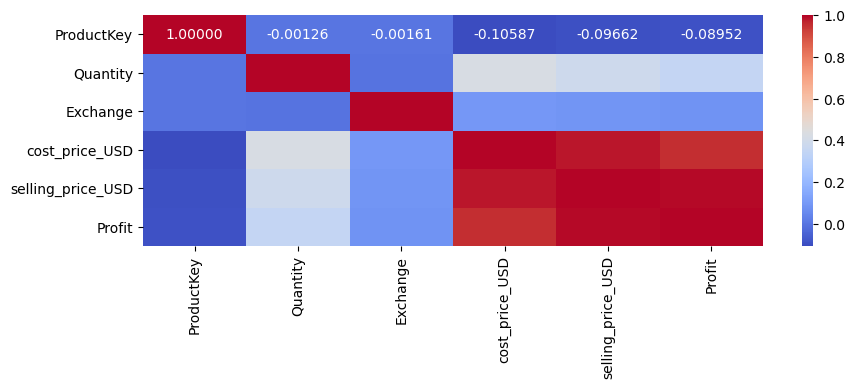

In [29]:
plt.figure(figsize=(10, 3))
sns.heatmap(corr_data, fmt=".5f", cmap= "coolwarm", annot= True)
plt.show()